In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("hm_train.csv")

In [3]:
test_data = pd.read_csv("hm_test.csv")

In [4]:
train_data.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [5]:
test_data.head()

,hmid,reflection_period,cleaned_hm,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,1
1,88306,3m,We moved back into our house after a remodel. ...,2
2,88307,3m,My fiance proposed to me in front of my family...,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1
4,88309,3m,I went out to a nice restaurant on a date with...,5


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60321 entries, 0 to 60320
Data columns (total 5 columns):
hmid                  60321 non-null int64
reflection_period     60321 non-null object
cleaned_hm            60321 non-null object
num_sentence          60321 non-null int64
predicted_category    60321 non-null object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40213 entries, 0 to 40212
Data columns (total 4 columns):
hmid                 40213 non-null int64
reflection_period    40213 non-null object
cleaned_hm           40213 non-null object
num_sentence         40213 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [8]:
train_data.reflection_period.value_counts()

24h    30455
3m     29866
Name: reflection_period, dtype: int64

In [9]:
train_data.num_sentence.value_counts()

1     49777
2      6030
3      2331
4      1047
5       493
6       215
7       125
8        73
10       41
9        37
11       27
13       17
16       15
12       13
18       12
19        7
17        7
25        7
14        7
21        5
23        5
24        3
15        3
37        2
31        2
20        2
22        2
26        2
32        2
46        1
42        1
30        1
51        1
53        1
56        1
58        1
35        1
27        1
34        1
28        1
29        1
Name: num_sentence, dtype: int64

In [10]:
train_data[train_data.num_sentence == 29].cleaned_hm.values

array(['It was happened when I was in middle school. It was a beautiful sunny day. I used to go to school at 8 and my school started at 8:30. When school started we learned our lessons. The break time was 10:00. So at the break time we ate our lunch in our class. That day my lunch was very delicious, so I ate very fast. After having lunch I went to the cafeteria as usual with my friends. Our school cafeteria was vey popular and its was famous for it coffee. Just across from the cafeteria the smell of coffee made us want to drink.\r\r\n\r\r\nAs we were close friends, we enjoyed making jokes together. We always teased each other while we are in the way. We all were 5 together; Ye Nandi is tall and slim girl, Aye Myat Khine is very small girl like a Thumbelina, Sett Lett Kg is a beautiful girl, May Chen is a cute girl, and I. On that day May Chen teased me all that way to the cafeteria. She still teasing me when we got to the cafeteria. When we got there we bought some snacks and drinks f

In [11]:
train_data.predicted_category.value_counts()

affection           20880
achievement         20274
bonding              6561
enjoy_the_moment     6508
leisure              4242
nature               1127
exercise              729
Name: predicted_category, dtype: int64

In [12]:
# A function that will perform data cleaning by removing punctuation, removing stop words, stemming of words, turning to lower case

import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    ps = PorterStemmer()
    test_punc_removed_join_clean = [ps.stem(word) for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_clean

In [13]:
# Combining the text from both train and test dataframes to perform training

statements =  pd.concat([train_data["cleaned_hm"], test_data["cleaned_hm"]], axis=0)

In [14]:
statements

0        I went on a successful date with someone I fel...
1        I was happy when my son got 90% marks in his e...
2             I went to the gym this morning and did yoga.
3        We had a serious talk with some friends of our...
4        I went with grandchildren to butterfly display...
5                                  I meditated last night.
6        I made a new recipe for peasant bread, and it ...
7        I got gift from my elder brother which was rea...
8                  YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED
9        Watching cupcake wars with my three teen children
10       I came in 3rd place in my Call of Duty video g...
11       I completed my 5 miles run without break. It m...
12              went to movies with my friends it was fun 
13       I was shorting Gold and made $200 from the trade.
14       Hearing Songs It can be nearly impossible to g...
15       My son performed very well for a test preparat...
16        I helped my neighbour to fix their car damages

In [16]:
# Count of occurrences of words

wordcounts = {}
for statement in statements:
    for word in statement.split():
        if word not in wordcounts:
            wordcounts[word] = 1
        else:
            wordcounts[word] += 1

In [17]:
wordcounts

{'I': 94938,
 'went': 8185,
 'on': 14574,
 'a': 68494,
 'successful': 170,
 'date': 573,
 'with': 21504,
 'someone': 595,
 'felt': 2731,
 'sympathy': 3,
 'and': 55311,
 'connection': 36,
 'with.': 158,
 'was': 33199,
 'happy': 13595,
 'when': 7392,
 'my': 57083,
 'son': 2816,
 'got': 12676,
 '90%': 10,
 'marks': 82,
 'in': 24404,
 'his': 3564,
 'examination': 37,
 'to': 55009,
 'the': 47217,
 'gym': 384,
 'this': 5901,
 'morning': 1636,
 'did': 1608,
 'yoga.': 5,
 'We': 3005,
 'had': 12221,
 'serious': 61,
 'talk': 623,
 'some': 5746,
 'friends': 3094,
 'of': 24943,
 'ours': 13,
 'who': 2055,
 'have': 6568,
 'been': 4499,
 'flaky': 1,
 'lately.': 55,
 'They': 624,
 'understood': 48,
 'we': 7180,
 'good': 5041,
 'evening': 461,
 'hanging': 120,
 'out.': 407,
 'grandchildren': 37,
 'butterfly': 12,
 'display': 17,
 'at': 11164,
 'Crohn': 1,
 'Conservatory': 1,
 'meditated': 17,
 'last': 5024,
 'night.': 884,
 'made': 11084,
 'new': 8335,
 'recipe': 198,
 'for': 26006,
 'peasant': 2,
 'br

In [18]:
# Total number of words 

len(wordcounts)

56978

In [89]:
# Removing the words which have occured only once

threshold = 2
wordcounts_new = {}
for word, count in wordcounts.items():
    if count>=threshold:
        wordcounts_new[word] = count

In [90]:
# Total number of words that occurred more than once

len(wordcounts_new)

27734

In [93]:
# Text with words occuring more than once

new_statements = []
for statement in statements:
    s = ' '.join([word for word in statement.split() if word in wordcounts_new.keys()]);
    new_statements.append(s)

In [94]:
new_statements

['I went on a successful date with someone I felt sympathy and connection with.',
 'I was happy when my son got 90% marks in his examination',
 'I went to the gym this morning and did yoga.',
 'We had a serious talk with some friends of ours who have been lately. They understood and we had a good evening hanging out.',
 'I went with grandchildren to butterfly display at',
 'I meditated last night.',
 'I made a new recipe for peasant bread, and it came out spectacular!',
 'I got gift from my elder brother which was really surprising me',
 'YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED',
 'Watching cupcake wars with my three teen children',
 'I came in 3rd place in my Call of Duty video game.',
 'I completed my 5 miles run without break. It makes me feel strong.',
 'went to movies with my friends it was fun',
 'I was Gold and made $200 from the trade.',
 "Hearing Songs It can be nearly impossible to go from angry to happy, so you're just looking for the thought that eases you out of your angry

In [95]:
# Using countvectorizer to convert text into matrix of token counts 

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer= message_cleaning)
dataset_cv = vectorizer.fit_transform(new_statements)

In [96]:
dataset_cv.shape

(100534, 9965)

In [97]:
print(vectorizer.get_feature_names())

['0', '02', '0430', '04869', '06', '09', '099', '1', '10', '100', '1000', '10000', '100000', '1002', '100k', '100th', '101', '1010', '1030', '104', '108', '10am', '10class', '10k', '10lb', '10pm', '10th', '10year', '11', '1100', '110km', '11200', '1130', '115', '115lb', '11month', '11pm', '12', '120', '1200', '1200am', '1222', '1230', '125', '12th', '13', '130', '1300', '135', '13th', '14', '140', '1400', '140km', '1473', '14th', '14yearold', '15', '150', '1500', '15000', '152017', '153', '1530', '15a30', '15th', '16', '160', '16th', '17', '170', '1700', '1745', '175', '1776', '17th', '18', '180', '1800', '1819', '182', '1852', '1899he', '18k', '18th', '19', '190', '1905', '195', '1960', '1979', '1993mi', '1998', '1999', '19thcenturi', '1s', '1st', '1week', '1year', '1yearold', '2', '20', '200', '2000', '20000', '2000got', '2004', '2005', '2006', '2007', '2008', '200meter', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '20lb', '20min', '20th', '21', '215', '21

In [98]:
labels=train_data["predicted_category"].values

In [101]:
# Training on first 60321 rows i.e labelled data

X = dataset_cv[:60321,:]
y = labels

In [102]:
# Splitting into train and test data to evaluate the model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [103]:
# Creating a random forest model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 200)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
y_pred_rf = rf.predict(X_test)

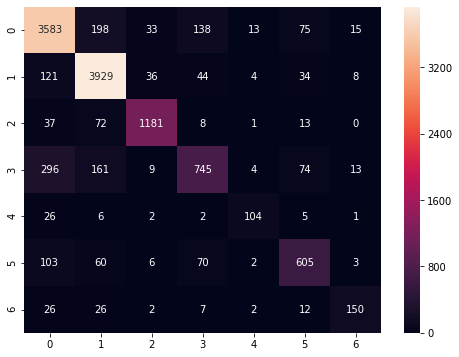

In [108]:
# Visualizing the performance of model using confusion matrix

plt.figure(figsize=(8,6))
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,y_pred_rf), fmt="g", annot=True)
plt.show()

In [109]:
# Evaluating the performance of model using classification report

print(classification_report(y_test,y_pred_rf))

                  precision    recall  f1-score   support

     achievement       0.85      0.88      0.87      4055
       affection       0.88      0.94      0.91      4176
         bonding       0.93      0.90      0.92      1312
enjoy_the_moment       0.73      0.57      0.64      1302
        exercise       0.80      0.71      0.75       146
         leisure       0.74      0.71      0.73       849
          nature       0.79      0.67      0.72       225

        accuracy                           0.85     12065
       macro avg       0.82      0.77      0.79     12065
    weighted avg       0.85      0.85      0.85     12065



THE 'WEIGHTED AVERAGE F1-SCORE' OF MODEL COMES OUT TO BE 0.85

In [105]:
# Predicting the targets for unlabelled data

y_pred_new_rf = rf.predict(dataset_cv[60321:,:])

In [106]:
# Dataframe with Id of the person and corresponding source of happiness

predictions = pd.concat([test_data["hmid"], pd.Series(y_pred_new_rf)], keys=["hmid", "predicted_category"], axis=1)
predictions

,hmid,predicted_category
0,88305,bonding
1,88306,achievement
2,88307,affection
3,88308,bonding
4,88309,affection
5,88310,leisure
6,88311,achievement
7,88312,affection
8,88313,leisure
9,88314,leisure


In [110]:
# Exporting the dataframe as a csv file

predictions.to_csv("predicted_categories.csv", index=False)